In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import arff, pandas as pd, numpy as np
from IPython.display import display, HTML
from sklearn.preprocessing import LabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from efficient_apriori import apriori

%matplotlib inline

plt.style.use('bmh')

#### Loading the data

In [94]:
train_df = pd.read_csv("./clean_data/clean_train.csv")
test_df = pd.read_csv("./clean_data/clean_test.csv")

In [95]:
train_df.info()
train_df.drop(['class'], axis='columns' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), object(1)
memory usage: 78.3+ MB


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,38312.0,0.713189,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,14.0,0.000000,6.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,102960.0,0.713189,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,78696.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,153204.0,0.000000,1.820000e+02,190620.639314,0.0,0.0,0.0,0.0,0.0,11804.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [93]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
 
oht = OnehotTransactions()
oht_ary = oht.fit(train_df).transform(train_df)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)     

 
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
print (frequent_itemsets)

from mlxtend.frequent_patterns import association_rules
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(len(frequent_itemsets))
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print (rules)
 
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])
lift =rules.as_matrix(columns=['lift'])

           0      1      2      3      4      5      6      7      8      9  \
0      False  False  False  False  False  False  False  False  False  False   
1       True  False  False  False  False  False  False  False  False  False   
2       True  False  False  False  False  False  False  False  False  False   
3       True  False  False  False  False  False  False  False  False  False   
4       True  False  False  False  False  False  False  False  False  False   
5       True  False  False  False  False  False  False  False  False  False   
6       True  False  False  False  False  False  False  False  False  False   
7       True  False  False  False  False  False  False  False  False  False   
8       True   True  False  False  False  False  False  False  False  False   
9       True  False   True  False  False  False  False  False  False  False   
10      True  False  False   True  False  False  False  False  False  False   
11      True  False  False  False   True  False  Fal

    support   itemsets
0  0.002833        (0)
1  0.002833        (_)
2  0.001100        (a)
3  0.002833     (0, _)
4  0.001083     (0, a)
5  0.001083     (a, _)
6  0.001083  (0, a, _)
7
   antecedents consequents  antecedent support  consequent support   support  \
0          (0)         (_)            0.002833            0.002833  0.002833   
1          (_)         (0)            0.002833            0.002833  0.002833   
2          (0)         (a)            0.002833            0.001100  0.001083   
3          (a)         (0)            0.001100            0.002833  0.001083   
4          (a)         (_)            0.001100            0.002833  0.001083   
5          (_)         (a)            0.002833            0.001100  0.001083   
6       (0, a)         (_)            0.001083            0.002833  0.001083   
7       (0, _)         (a)            0.002833            0.001100  0.001083   
8       (a, _)         (0)            0.001083            0.002833  0.001083   
9          (0)

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\mlxtend\preprocessing\onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [89]:
print(len(rules))

12


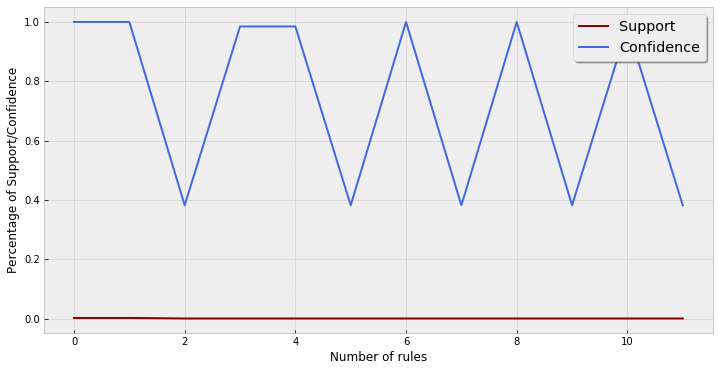

In [90]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(12), support, color= "darkred", label= 'Support')
ax.plot(np.arange(12), confidence,color= "royalblue",label='Confidence')
#ax.plot(np.arange(12), lift ,color= "skyblue",label='Lift')

plt.xlabel('Number of rules')
plt.ylabel('Percentage of Support/Confidence')
        

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

plt.show()